# <center>**Phân loại bệnh tiểu đường trên bộ dữ liệu Pima Indians Diabetes**<center>

## **1. Định nghĩa vấn đề (Define Problem)**

+ **Mô tả**:
    + Bộ dữ liệu Pima Indians Diabetes là một bộ dữ liệu phân loại được sử dụng để dự đoán xem một bệnh nhân nữ người Pima Indian, ít nhất 21 tuổi, có bị tiểu đường hay không dựa trên các chỉ số chẩn đoán nhất định.
    + Đây là một bài toán phân loại nhị phân (Binary Classification).
+ **Dữ liệu vào (8 thuộc tính)**:
    1. **Pregnancies**: Số lần mang thai.
    2. **Glucose**: Nồng độ Glucose trong huyết tương sau 2 giờ làm xét nghiệm dung nạp Glucose đường uống (OGTT).
    3. **BloodPressure**: Huyết áp tâm trương (mm Hg).
    4. **SkinThickness**: Độ dày nếp gấp da cơ tam đầu (mm).
    5. **Insulin**: Insulin huyết thanh 2 giờ (mu U/ml).
    6. **BMI**: Chỉ số khối cơ thể (kg/(m^2)).
    7. **DiabetesPedigreeFunction**: Chức năng phả hệ tiểu đường (đánh giá nguy cơ di truyền).
    8. **Age**: Tuổi (năm).
+ **Kết quả (Output)**: **Outcome** (Biến lớp, 0: Không tiểu đường, 1: Tiểu đường).

## **2. Chuẩn bị vấn đề (Prepare Problem)**

### **2.1. Khai báo thư viện (Import Libraries)**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

print("Các thư viện đã được khai báo.")

Các thư viện đã được khai báo.


### **2.2. Nạp dữ liệu (Load Data)**

In [18]:
# File path tương đối là tên file bạn đã gửi lên.
file_path = 'pima-indians-diabetes-data.csv'

# Đặt lại tên cột để dễ thao tác
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Nạp dữ liệu từ file CSV
df = pd.read_csv(file_path, header=0)

# Gán lại tên cột cho DataFrame
df.columns = column_names

# Hiển thị 5 dòng đầu tiên
print("5 dòng đầu tiên của dữ liệu:")
print(df.head())

5 dòng đầu tiên của dữ liệu:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                   627.000   50        1  
1                   351.000   31        0  
2                   672.000   32        1  
3                   167.000   21        0  
4                     2.288   33        1  


## **3. Phân tích dữ liệu (Analyze Data)**

### **3.1. Thống kê mô tả (Descriptive Statistics)**

#### Hiển thị một số thông tin về dữ liệu

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Kiểm tra tính toàn vẹn của dữ liệu (Kiểm tra giá trị rỗng/NaN)

In [20]:
print("Kiểm tra giá trị rỗng (NaN) theo cột:")
print(df.isnull().sum())

Kiểm tra giá trị rỗng (NaN) theo cột:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Các tính chất thống kê trên dữ liệu số

In [21]:
print("Thống kê mô tả trên dữ liệu số:")
print(df.describe().T)

# Lưu ý: Giá trị 0 trong các cột 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' 
# thường đại diện cho giá trị thiếu/không hợp lệ trong bộ dữ liệu này, 
# điều này cần được xử lý trong bước làm sạch dữ liệu.

Thống kê mô tả trên dữ liệu số:
                          count        mean         std   min    25%    50%  \
Pregnancies               768.0    3.845052    3.369578   0.0    1.0    3.0   
Glucose                   768.0  120.894531   31.972618   0.0   99.0  117.0   
BloodPressure             768.0   69.105469   19.355807   0.0   62.0   72.0   
SkinThickness             768.0   20.536458   15.952218   0.0    0.0   23.0   
Insulin                   768.0   79.799479  115.244002   0.0    0.0   30.5   
BMI                       768.0   31.992578    7.884160   0.0   27.3   32.0   
DiabetesPedigreeFunction  768.0  347.079349  254.431659   0.1  165.0  295.5   
Age                       768.0   33.240885   11.760232  21.0   24.0   29.0   
Outcome                   768.0    0.348958    0.476951   0.0    0.0    0.0   

                             75%    max  
Pregnancies                 6.00   17.0  
Glucose                   140.25  199.0  
BloodPressure              80.00  122.0  
SkinThick

#### Tần số xuất hiện trên dữ liệu phân lớp và dữ liệu danh mục

In [22]:
print("Tần số xuất hiện của biến lớp (Outcome):")
print(df['Outcome'].value_counts())

print("\nTỷ lệ phần trăm của biến lớp (Outcome):")
print(df['Outcome'].value_counts(normalize=True) * 100)

Tần số xuất hiện của biến lớp (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

Tỷ lệ phần trăm của biến lớp (Outcome):
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


#### Mối tương quan giữa các tính chất

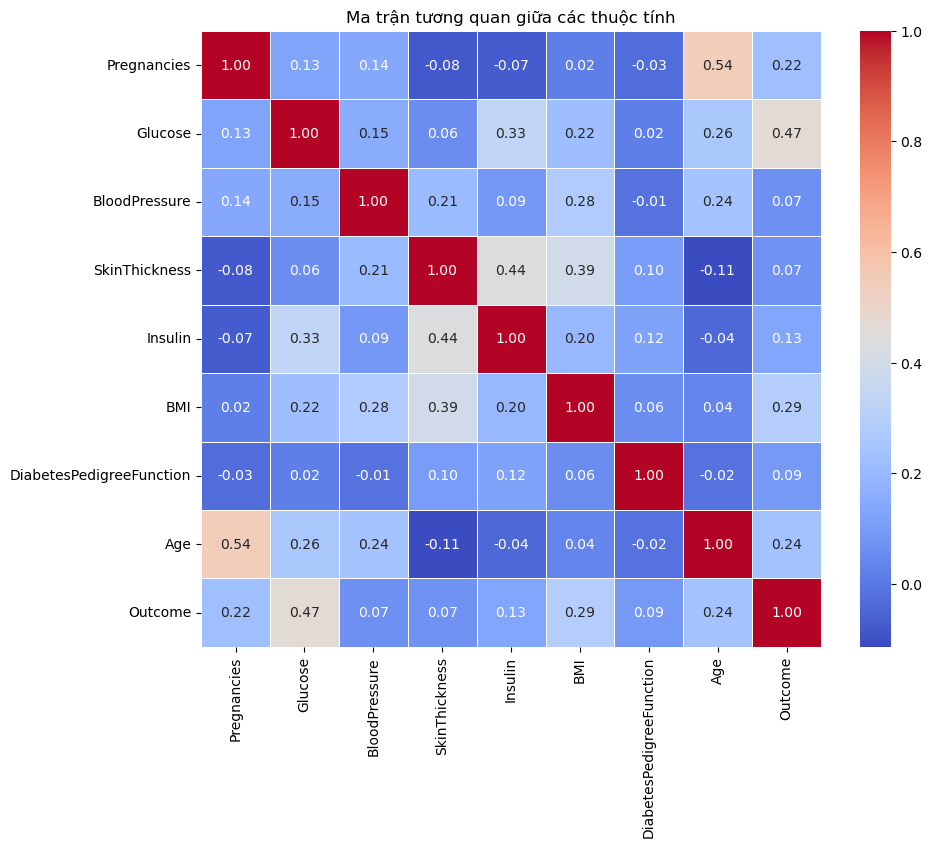

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

### **3.2. Hiển thị dữ liệu (vẽ hình)**

#### + Hiển thị trên từng tính chất đơn

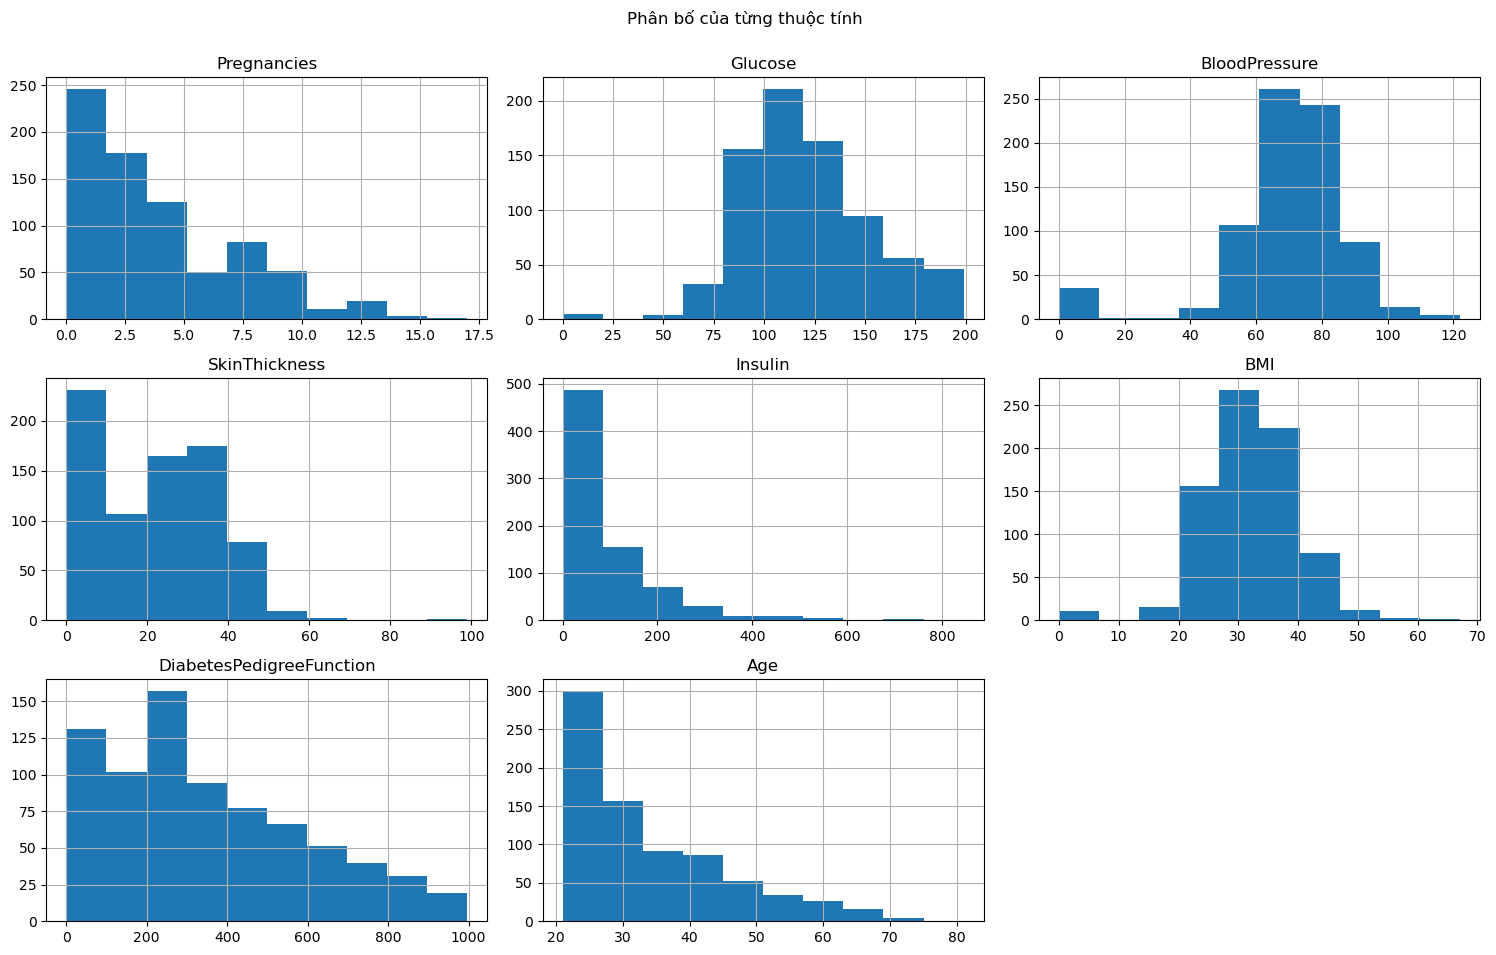

In [24]:
numerical_features = df.columns[:-1] # Tất cả trừ cột Outcome
df[numerical_features].hist(figsize=(15, 10), bins=10)
plt.suptitle('Phân bố của từng thuộc tính')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

#### Hiển thị nhiều tính chất

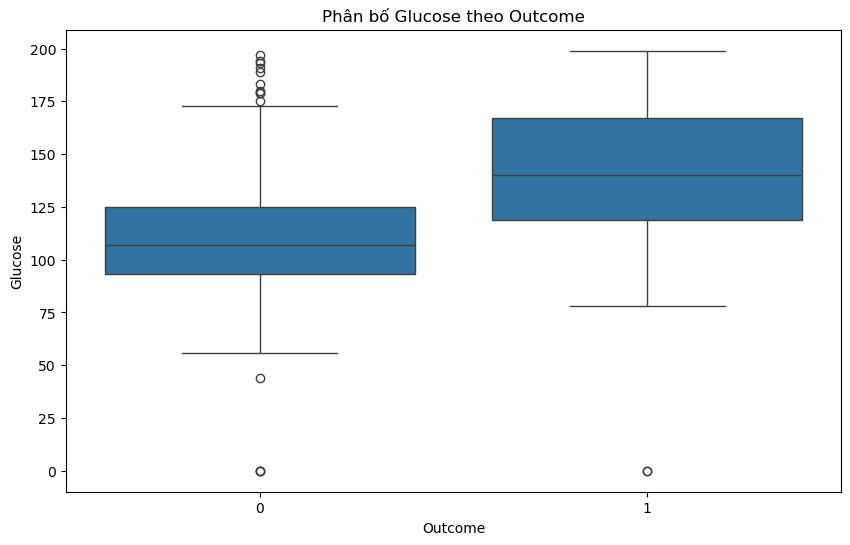

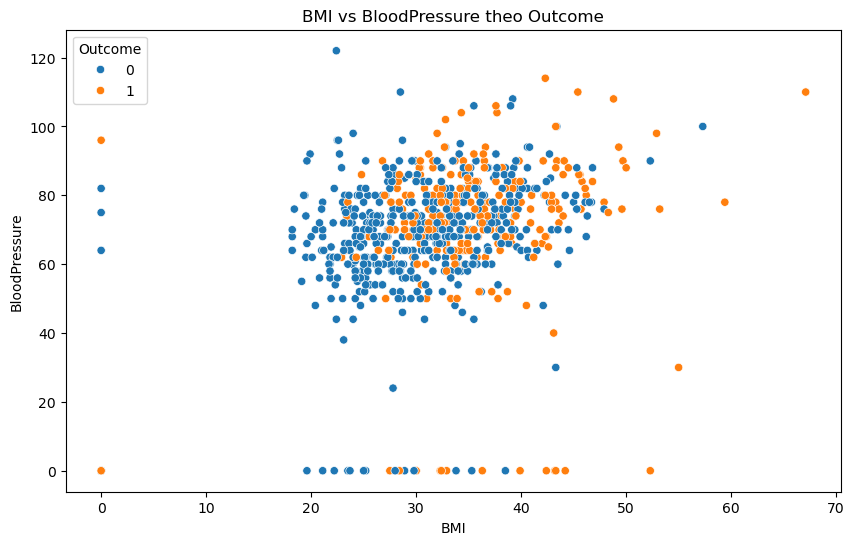

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Phân bố Glucose theo Outcome')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='BloodPressure', hue='Outcome', data=df)
plt.title('BMI vs BloodPressure theo Outcome')
plt.show()

## **4. Chuẩn bị dữ liệu (Prepare Data)**

### **4.1. Làm sạch dữ liệu (Clean Data)**

#### Tạo bảng dữ liệu làm sạch (Thực hiện trực tiếp trên bản sao để giữ dữ liệu gốc)

In [26]:
df_clean = df.copy() # Tạo bản sao để làm sạch
print("Đã tạo bản sao dữ liệu df_clean.")

Đã tạo bản sao dữ liệu df_clean.


#### Xoá dữ liệu trùng nhau

In [27]:
initial_rows = len(df_clean)
df_clean.drop_duplicates(inplace=True)
rows_after_drop = len(df_clean)
print(f"Số dòng bị xóa do trùng lặp: {initial_rows - rows_after_drop}")

Số dòng bị xóa do trùng lặp: 0


#### Xử lí giá trị rỗng, không hợp lệ (Giá trị 0 trong các cột đo lường)

In [28]:
# Các cột chứa giá trị 0 không hợp lệ (ngoại trừ Pregnancies và Outcome)
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Thay thế giá trị 0 bằng NaN
df_clean[cols_to_replace] = df_clean[cols_to_replace].replace(0, np.nan)

print("Số lượng NaN sau khi thay thế 0:")
print(df_clean.isnull().sum())

# Xử lý giá trị NaN bằng phương pháp thay thế (Imputation)
# Ở đây ta dùng Median (trung vị) do dữ liệu có thể có ngoại lai
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_clean[cols_to_replace] = imputer.fit_transform(df_clean[cols_to_replace])

print("\nSố lượng NaN sau khi xử lý imputation:")
print(df_clean.isnull().sum())

Số lượng NaN sau khi thay thế 0:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Số lượng NaN sau khi xử lý imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### **4.2. Biến đổi dữ liệu (Transform Data)**

#### Chuẩn hoá dữ liệu (Standardization - Chuẩn hóa Z-Score)

In [29]:
scaler = StandardScaler()
X = df_clean.drop('Outcome', axis=1) # Các thuộc tính
y = df_clean['Outcome'] # Biến mục tiêu

# Chuẩn hoá các thuộc tính X
X_scaled = scaler.fit_transform(X)

# Tạo lại DataFrame từ dữ liệu đã chuẩn hóa
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Outcome'] = y.values

print("5 dòng đầu tiên của dữ liệu sau khi chuẩn hóa (StandardScaler):")
print(df_scaled.head())

5 dòng đầu tiên của dữ liệu sau khi chuẩn hóa (StandardScaler):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  Outcome  
0                  1.100897  1.425995        1  
1                  0.015419 -0.190672        0  
2                  1.277877 -0.105584        1  
3                 -0.708232 -1.041549        0  
4                 -1.356026 -0.020496        1  


#### Lưu trữ dữ liệu

In [30]:
# Lưu trữ dữ liệu đã được làm sạch và chuẩn hóa ra file CSV mới
df_scaled.to_csv('pima-indians-diabetes-processed.csv', index=False)
print("Dữ liệu đã được lưu vào file 'pima-indians-diabetes-processed.csv'")

Dữ liệu đã được lưu vào file 'pima-indians-diabetes-processed.csv'


# <center>**Kết thúc**<center>